In [ ]:
### data obtained wtih data_genome_repartition_chipseeker.R
# Annotation Categories
categories = [
    "Promoter",
    "5' UTR",
    "3' UTR",
    "Intron",
    "Intergenic",
    "Exon",
]

# TAIR10 (Arabidopsis)
# Promoter = 100 bp around TSS
tair10 = [
    17.32,  # Promoter
    5.48,   # 5' UTR
    6.18,   # 3' UTR
    7.55,   # Intron
    41.65,   # Intergenic
    21.82,  # Exon
]

# mm39 (Mouse)
# Promoter = 500 bp around TSS
mm39 = [
    12.99,  # Promoter
    0.23,   # 5' UTR
    1.41,   # 3' UTR
    41.16,  # Intron
    40.94,   # Intergenic
    3.27,   # Exon

]

# hg38 (Human)
# Promoter = 500 bp around TSS
hg38 = [
    19.80,  # Promoter
    0.20,   # 5' UTR
    2.33,   # 3' UTR
    47.28,  # Intron
    26.21,   # Intergenic
    4.18,   # Exon

]

# dm6 (Drosophila)
# Promoter = 100 bp around TSS
dm6 = [
    15.05,  # Promoter
    3.52,   # 5' UTR
    3.05,   # 3' UTR
    39.71,  # Intron
    27.90,   # Intergenic
    10.77,  # Exon

]

### DNAse
dnase_dm6 = [
    47.73,  # Promoter
    2.68,   # 5' UTR
    2.28,   # 3' UTR
    24.95,  # Intron
    18.15,   # Intergenic
    4.21,   # Exon

]

# hg38 (Meuleman)
# Promoter = 1 kb around TSS
dnase_hg38 = [
    10.5,   # Promoter
    0.2,    # 5' UTR
    2.31,   # 3' UTR
    50.11,  # Intron
    33.01,   # Intergenic
    3.87,   # Exon

]

# mm39 (ENCODE)
# Promoter = 500 bp around TSS
dnase_mm39 = [
    3.6,    # Promoter
    0.28,   # 5' UTR
    1.64,   # 3' UTR
    41.96,  # Intron
    48.82,   # Intergenic
    3.7,    # Exon

]

# TAIR10 (PlanRegMap)
# Promoter = 100 bp around TSS
dnase_tair10 = [
    37.49,  # Promoter
    2.27,   # 5' UTR
    9.29,   # 3' UTR
    2.84,   # Intron
    38.54,   # Intergenic
    9.56,   # Exon
]

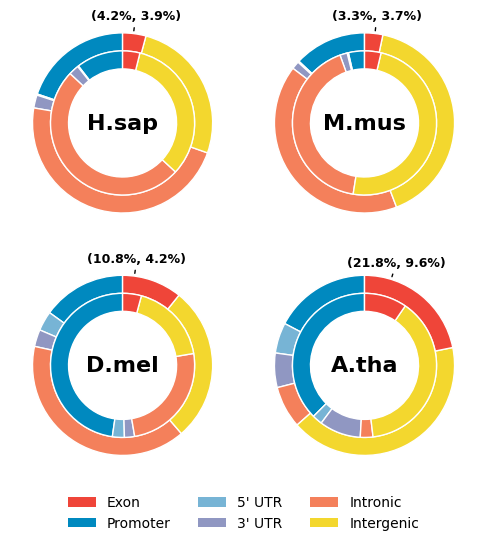

In [4]:
###donut 2x2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
import seaborn as sns
import math
matplotlib.rcParams['pdf.fonttype'] = 42

# -- Dictionary structure --
data_hg = {'ReMap2022': hg38, 'DNAse': dnase_hg38}
data_mm = {'ReMap2022': mm39, 'DNAse': dnase_mm39}
data_dm = {'ReMap2022': dm6,  'DNAse': dnase_dm6}
data_tair = {'ReMap2022': tair10, 'DNAse': dnase_tair10}

data_dicts = {
    'H.sap': data_hg,
    'M.mus': data_mm,
    'D.mel': data_dm,
    'A.tha': data_tair
}

# -- Colors for layers --
colors = {
    'ReMap2022': ['#0089bf','#77b4d5','#9097c2','#f4805b','#f3d72e','#ef4539'],
    'DNAse':     ['#0089bf','#77b4d5','#9097c2','#f4805b','#f3d72e','#ef4539']
}

# -- Data labels (for center text) --
data_labels = {
    'H.sap': "H.sap",
    'M.mus': "M.mus",
    'D.mel': "D.mel",
    'A.tha': "A.tha"
}

# -- Create the 2x2 figure --
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
axes = axes.flatten()

for i, (species, data) in enumerate(data_dicts.items()):
    ax = axes[i]
    
    # Force a consistent order for the layers
    outer_layer = "ReMap2022"
    inner_layer = "DNAse"
    
    # --- Plot OUTER layer (ReMap2022) ---
    outer_values = data[outer_layer]
    outer_wedges, _ = ax.pie(
        outer_values, 
        radius=1.0,
        colors=colors[outer_layer],
        startangle=90,
        wedgeprops=dict(width=0.2, edgecolor='white')
    )
    
    # --- Plot INNER layer (DNAse) ---
    inner_values = data[inner_layer]
    inner_wedges, _ = ax.pie(
        inner_values, 
        radius=0.8,
        colors=colors[inner_layer],
        startangle=90,
        wedgeprops=dict(width=0.2, edgecolor='white')
    )
    
    # -- Draw center white circle for the "donut" --
    ax.add_artist(plt.Circle((0,0), 0.6, fc='white'))
    ax.set_aspect('equal')
    
    # -- Place the species label in the center --
    ax.text(
        0, 0, data_labels[species],
        ha='center', va='center', fontsize=16, fontweight='bold'
    )
    
    # ----------------------------------------------------------------
    #   ANNOTATE ONLY THE "Exon" WEDGE with combined percentages
    # ----------------------------------------------------------------
    # Exon is colored #ef4539 in both layers (last in the color list).
    # Let's assume the color list is always in the same category order:
    # [Promoter, 5'UTR, 3'UTR, Intronic, Intergenic, Exon].
    # So the "Exon" wedge is the last wedge in each "pie" call => index -1.
    
    exon_outer_value = outer_values[-1]
    exon_inner_value = inner_values[-1]
    
    # Get the wedge object for the outer Exon
    #exon_outer_wedge = outer_wedges[-1]
    exon_inner_wedge = inner_wedges[-1]
    # Find the midpoint angle of that wedge (in degrees)
    theta1, theta2 = exon_inner_wedge.theta1, exon_inner_wedge.theta2
    theta_mid = 0.5 * (theta1 + theta2)
    
    # Convert midpoint angle to radians
    theta_rad = math.radians(theta_mid)
    
    # We'll place the annotation just outside the outer donut.
    # The outer donut radius is 1.0, so let's put the arrow tip at ~radius=1.0
    # and the text a bit further out.
    r_arrow = 1  # radius for the arrow tip
    r_text  = 1.2  # radius for the text
    x_arrow = r_arrow * math.cos(theta_rad)
    y_arrow = r_arrow * math.sin(theta_rad)
    x_text  = r_text  * math.cos(theta_rad)
    y_text  = r_text  * math.sin(theta_rad)
    
    # Build a label like (10%, 50%)
    label_str = f"({exon_outer_value:.1f}%, {exon_inner_value:.1f}%)"
    
    # Annotate
    ax.annotate(
        label_str,
        xy=(x_arrow, y_arrow),    # arrow tip (points to the wedge)
        xytext=(x_text, y_text),  # label position
        arrowprops=dict(
            arrowstyle="-",
            #connectionstyle="arc3,rad=0.3"
        ),
        ha='center', va='center',fontweight='bold',
        fontsize=9
    )

# -- Build a single legend for all categories at the figure level (optional) --
c1 = Patch(facecolor='#0089bf', label="Promoter")
c2 = Patch(facecolor='#77b4d5', label="5' UTR")
c3 = Patch(facecolor='#9097c2', label="3' UTR")
c4 = Patch(facecolor='#f4805b', label="Intronic")
c5 = Patch(facecolor='#f3d72e', label="Intergenic")
c6 = Patch(facecolor='#ef4539', label="Exon")

fig.legend(
    handles=[c6, c1, c2, c3, c4, c5],
    loc='lower center', bbox_to_anchor=(0.5, -0.1),
    ncol=3, frameon=False
)

plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig1/remap_dnase_all_species_chipseeker.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig1/remap_dnase_all_species_chipseeker.png", format="png", bbox_inches="tight", dpi=450)

plt.show()


